# Python标准库
![Python标准库](media/Python标准库.png)

Python自身提供了比较丰富的生态，拿来即用，可极大的提高开发效率

## 01. time库
![](media/time.png)

**Python处理时间的标准库**

### 1.1 获取现在时间

（1）time.localtime()  本地时间

（2）time.gmtime()   UTC世界统一时间

北京时间比时间统一时间UTC早8个小时

In [1]:
import time

t_local = time.localtime()
t_UTC = time.gmtime()
print("t_local", t_local)           # 本地时间
print("t_UTC", t_UTC)               # UTC统一时间

t_local time.struct_time(tm_year=2020, tm_mon=6, tm_mday=12, tm_hour=9, tm_min=12, tm_sec=35, tm_wday=4, tm_yday=164, tm_isdst=0)
t_UTC time.struct_time(tm_year=2020, tm_mon=6, tm_mday=12, tm_hour=1, tm_min=12, tm_sec=35, tm_wday=4, tm_yday=164, tm_isdst=0)


In [2]:
time.ctime()                      # 返回本地时间的字符串

'Fri Jun 12 09:12:54 2020'

### 1.2 时间戳与计时器

（1）`time.time()` &emsp;         返回自纪元以来的秒数，记录sleep
  
（2）`time.perf_counter()` &emsp;    随意选取一个时间点，记录现在时间到该时间点的间隔秒数，记录sleep
  
（3）`time.process_time()` &emsp;    随意选取一个时间点，记录现在时间到该时间点的间隔秒数，不记录sleep
  
`perf_counter()` 精度较 `time()` 更高一些

In [3]:
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.process_time()
print(t_1_start)
print(t_2_start)
print(t_3_start)

res = 0
for i in range(1000000):
    res += i
    
time.sleep(5)
t_1_end = time.time()
t_2_end = time.perf_counter()
t_3_end = time.process_time()

print("time方法：{:.3f}秒".format(t_1_end-t_1_start))
print("perf_counter方法：{:.3f}秒".format(t_2_end-t_2_start))
print("process_time方法：{:.3f}秒".format(t_3_end-t_3_start))

1591924498.414415
6e-07
1.015625
time方法：5.150秒
perf_counter方法：5.150秒
process_time方法：0.141秒


### 1.3 格式化

（1）`time.strftime()` 自定义格式化输出

In [7]:
lctime = time.localtime()
time.strftime("%Y-%m-%d %A %H:%M:%S", lctime)

'2019-08-29 Thursday 16:54:35'

### 1.4 睡觉觉

（1）time.sleep()

## 02. random库
![](media/random.png)
**随机数在计算机应用中十分常见**
  
**Python通过random库提供各种伪随机数**
  
**基本可以用于除加密解密算法外的大多数工程应用**

### 2.1 随机种子 — seed(a=None)

（1）相同种子会产生相同的随机数
  
（2）如果不设置随机种子，以系统当前时间为默认值

In [4]:
from random import *

seed(10)
print(random())
seed(10)
print(random())

0.5714025946899135
0.5714025946899135


In [8]:
print(random())

0.81332125135732


### 2.2 产生随机整数

**（1）`randint(a, b)` — 产生`[a, b]`之间的随机整数**

In [9]:
numbers = [randint(1,10) for i in range(10)]
numbers

[5, 3, 1, 9, 8, 6, 2, 4, 6, 1]

**（2）`randrange(a)` — 产生`[0, a)`之间的随机整数**

In [10]:
numbers = [randrange(10) for i in range(10)]
numbers

[6, 2, 9, 5, 6, 6, 4, 4, 7, 2]

**（3）`randrange(a, b, step)` — 产生`[a, b)`之间以`setp`为步长的随机整数**

In [11]:
numbers = [randrange(0, 10, 2) for i in range(10)]
numbers

[4, 4, 2, 6, 2, 6, 8, 6, 0, 8]

### 2.3 产生随机浮点数

**（1）`random()` — 产生 `[0.0, 1.0)` 之间的随机浮点数**

In [12]:
numbers = [random() for i in range(10)]
numbers

[0.004055144158407464,
 0.13397252704913387,
 0.941002271395834,
 0.3028605620290723,
 0.3661456016604264,
 0.8981962445391883,
 0.31436380495645067,
 0.5489821840124055,
 0.43603095762412225,
 0.06499417612685054]

**（2）`uniform(a, b)` — 产生 `[a, b]` 之间的随机浮点数**

In [13]:
numbers = [uniform(2.1, 3.5) for i in range(10)]
numbers

[2.9183647159827024,
 3.281695056726663,
 2.318986485742369,
 2.414018556160458,
 2.678018290800777,
 2.1516948166820806,
 2.7952448980631672,
 3.245176010201485,
 3.021047314262753,
 2.846877229913881]

### 2.4 序列用函数

**（1）`choice(seq)` — 从序列类型中随机返回一个元素**

In [17]:
choice(['win', 'lose', 'draw'])

'draw'

In [18]:
choice("python")

't'

**（2）`choices(seq, weights=None, k)` — 对序列类型进行k次重复采样，可设置权重**

In [19]:
choices(['win', 'lose', 'draw'], k=5)

['draw', 'win', 'draw', 'draw', 'lose']

In [20]:
choices(['win', 'lose', 'draw'], [4,4,2], k=10)

['draw', 'win', 'win', 'draw', 'lose', 'lose', 'win', 'lose', 'draw', 'win']

**（3）`shuffle(seq)` — 将序列类型中元素随机排列，返回打乱后的序列**

In [21]:
numbers = ["one", "two", "three", "four"]
shuffle(numbers)
numbers

['two', 'four', 'one', 'three']

**（4）`sample(pop, k)` — 从pop类型中随机选取k个元素，以列表类型返回**

In [51]:
sample([10, 20, 30, 40, 50], k=3)

[30, 40, 10]

### 2.5 概率分布 — 以高斯分布为例

**`gauss(mean, std)` — 生产一个符合高斯分布的随机数**

In [66]:
number = gauss(0, 1)
number

0.34777271945167737

**多生成几个**

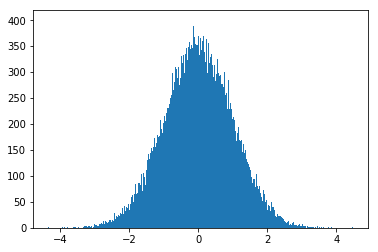

In [68]:
import matplotlib.pyplot as plt

res = [gauss(0, 1) for i in range(100000)]

plt.hist(res, bins=1000)
plt.show()

【例1】用random库实现简单的微信红包分配

In [69]:
import random


def red_packet(total, num):
    """红包总金额，红包总数量"""
    for i in range(1, num):
        per = random.uniform(0.01, total/(num-i+1)*2)          # 保证每个人获得红包的期望是total/num
        total = total - per
        print("第{}位红包金额： {:.2f}元".format(i, per))
    else:
        print("第{}位红包金额： {:.2f}元".format(num, total))
            
            
red_packet(10, 5)

第1位红包金额： 0.11元
第2位红包金额： 0.42元
第3位红包金额： 2.69元
第4位红包金额： 1.50元
第5位红包金额： 5.28元


In [70]:
import random
import numpy as np


def red_packet(total, num):
    ls = []
    for i in range(1, num):
        per = round(random.uniform(0.01, total/(num-i+1)*2), 2)     # 保证每个人获得红包的期望是total/num
        ls.append(per)
        total = total - per
    else:
        ls.append(total)
        
    return ls
            
            
# 重复发十万次红包，统计每个位置的平均值（约等于期望）
res = []
for i in range(100000):
    ls = red_packet(10,5)
    res.append(ls)

res = np.array(res)
print(res[:10])
np.mean(res, axis=0)

[[2.13 1.44 1.01 2.92 2.5 ]
 [3.48 3.24 1.71 1.08 0.49]
 [2.18 3.05 1.81 1.47 1.49]
 [1.03 4.28 2.09 1.88 0.72]
 [3.69 2.22 2.43 0.59 1.07]
 [0.18 1.26 3.53 2.7  2.33]
 [1.43 0.65 2.52 3.06 2.34]
 [1.32 1.05 0.46 6.21 0.96]
 [2.6  2.02 2.7  2.52 0.16]
 [0.17 3.71 1.71 1.   3.41]]


array([2.0020256, 2.0085351, 2.0038997, 2.0024788, 1.9830608])

【例2】生产4位由数字和英文字母构成的验证码

In [72]:
import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits + string.ascii_letters
v = random.sample(s, 4)
print(v)
print(''.join(v))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['c', 'N', 'l', 'V']
cNlV


## 03. collections库 — 容器数据类型
![](media/collections.png)

In [75]:
import collections

### 3.1 namedtuple — 具名元组

* 点的坐标，仅看数据，很难知道表达的是一个点的坐标

In [76]:
p = (1, 2)

* 构建一个新的元组子类  
  
     定义方法如下：typename 是元组名字，field_names 是域名

API
```
collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)
```

In [78]:
Point = collections.namedtuple("Point", ["x", "y"])
p = Point(1, y=2)
p

Point(x=1, y=2)

* 可以调用属性

In [79]:
print(p.x)
print(p.y)

1
2


* 有元组的性质

In [80]:
print(p[0])
print(p[1])
x, y = p
print(x)
print(y)

1
2
1
2


* 确实是元组的子类

In [81]:
print(isinstance(p, tuple))

True


【例】模拟扑克牌

In [83]:
Card = collections.namedtuple("Card", ["rank", "suit"])
ranks = [str(n) for n in range(2, 11)] + list("JQKA")    
suits = "spades diamonds clubs hearts".split()
print("ranks", ranks)
print("suits", suits)
cards = [Card(rank, suit) for rank in ranks
                          for suit in suits]
cards

ranks ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits ['spades', 'diamonds', 'clubs', 'hearts']


[Card(rank='2', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='hearts'),
 Card(rank='4', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='7', suit='clubs'),
 Card(rank='7', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='8', suit='clubs'),
 Card(rank='8', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='9', suit='diamonds'),
 Card(rank='9', suit='clubs'),


In [84]:
from random import *

In [85]:
# 洗牌
shuffle(cards)
cards

[Card(rank='7', suit='spades'),
 Card(rank='K', suit='diamonds'),
 Card(rank='A', suit='spades'),
 Card(rank='8', suit='hearts'),
 Card(rank='10', suit='clubs'),
 Card(rank='6', suit='clubs'),
 Card(rank='5', suit='clubs'),
 Card(rank='2', suit='diamonds'),
 Card(rank='Q', suit='clubs'),
 Card(rank='K', suit='clubs'),
 Card(rank='8', suit='spades'),
 Card(rank='3', suit='clubs'),
 Card(rank='K', suit='hearts'),
 Card(rank='4', suit='diamonds'),
 Card(rank='9', suit='diamonds'),
 Card(rank='4', suit='spades'),
 Card(rank='A', suit='clubs'),
 Card(rank='J', suit='hearts'),
 Card(rank='Q', suit='hearts'),
 Card(rank='J', suit='clubs'),
 Card(rank='7', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='10', suit='hearts'),
 Card(rank='9', suit='hearts'),
 Card(rank='10', suit='spades'),
 Card(rank='5', suit='hearts'),
 Card(rank='3', suit='diamonds'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='hearts'),
 Card(rank='Q', suit='spades'),
 Car

In [86]:
# 随机抽一张牌
choice(cards)

Card(rank='10', suit='hearts')

In [87]:
# 随机抽多张牌
sample(cards, k=5)

[Card(rank='2', suit='clubs'),
 Card(rank='9', suit='diamonds'),
 Card(rank='4', suit='hearts'),
 Card(rank='A', suit='spades'),
 Card(rank='Q', suit='hearts')]

### 3.2 Counter — 计数器工具

In [88]:
from collections import Counter

In [89]:
s = "牛奶奶找刘奶奶买牛奶"
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue']
cnt_str = Counter(s)
cnt_color = Counter(colors)
print(cnt_str)
print(cnt_color)

Counter({'奶': 5, '牛': 2, '找': 1, '刘': 1, '买': 1})
Counter({'blue': 3, 'red': 2, 'green': 1})


* 是字典的一个子类

In [90]:
print(isinstance(Counter(), dict))

True


* 最常见的统计 — `most_commom(n)`  
提供 n 个频率最高的元素和计数

In [87]:
cnt_color.most_common(2)

[('blue', 3), ('red', 2)]

* 元素展开 — `elements()`

In [91]:
list(cnt_str.elements())

['牛', '牛', '奶', '奶', '奶', '奶', '奶', '找', '刘', '买']

* 其他一些加减操作

In [89]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)
c+d

Counter({'a': 4, 'b': 3})

【例】从一副牌中抽取10张，大于10的比例有多少

In [92]:
cards = collections.Counter(tens=16, low_cards=36)
seen = sample(list(cards.elements()), k=10)
print(seen)

['low_cards', 'tens', 'tens', 'low_cards', 'low_cards', 'low_cards', 'tens', 'tens', 'low_cards', 'low_cards']


In [93]:
seen.count('tens') / 10

0.4

### 3.3 deque — 双向队列

列表访问数据非常快速
   
插入和删除操作非常慢——通过移动元素位置来实现
  
特别是 insert(0, v) 和 pop(0)，在列表开始进行的插入和删除操作

**双向队列可以方便的在队列两边高效、快速的增加和删除元素**

In [94]:
from collections import deque

d = deque('cde') 
d

deque(['c', 'd', 'e'])

In [95]:
d.append("f")            # 右端增加
d.append("g")
d.appendleft("b")        # 左端增加
d.appendleft("a")
d

deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [96]:
d.pop()           # 右端删除 
d.popleft()       # 左端删除
d

deque(['b', 'c', 'd', 'e', 'f'])

deque 其他用法可参考官方文档

## 04. itertools库 — 迭代器
![](media/itertools.png)

### 4.1 排列组合迭代器

（1）`product` — 笛卡尔积

结果是迭代器

In [97]:
import itertools

for i in itertools.product('ABC', '01'):
    print(i)

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [98]:
for i in itertools.product('ABC', repeat=3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'B')
('A', 'A', 'C')
('A', 'B', 'A')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'C', 'A')
('A', 'C', 'B')
('A', 'C', 'C')
('B', 'A', 'A')
('B', 'A', 'B')
('B', 'A', 'C')
('B', 'B', 'A')
('B', 'B', 'B')
('B', 'B', 'C')
('B', 'C', 'A')
('B', 'C', 'B')
('B', 'C', 'C')
('C', 'A', 'A')
('C', 'A', 'B')
('C', 'A', 'C')
('C', 'B', 'A')
('C', 'B', 'B')
('C', 'B', 'C')
('C', 'C', 'A')
('C', 'C', 'B')
('C', 'C', 'C')


（2）`permutations` — 排列

In [99]:
for i in itertools.permutations('ABCD', 3):   # 3 是排列的长度
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [101]:
for i in itertools.permutations(range(3)):
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


（3）`combinations` — 组合

In [102]:
for i in itertools.combinations('ABCD', 2):  # 2是组合的长度
    print(i)

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


In [103]:
for i in itertools.combinations(range(4), 3):
    print(i)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


（4）`combinations_with_replacement` — 元素可重复组合

In [104]:
for i in itertools.combinations_with_replacement('ABC', 2):  # 2是组合的长度
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


In [105]:
for i in itertools.product('ABC',repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'B')
('B', 'C')
('C', 'A')
('C', 'B')
('C', 'C')


### 4.2 拉链

（1）`zip` — 短拉链

In [106]:
for i in zip("ABC", "012", "xyz"):
    print(i)

('A', '0', 'x')
('B', '1', 'y')
('C', '2', 'z')


长度不一时，执行到最短的对象处，就停止

In [107]:
for i in zip("ABC", [0, 1, 2, 3, 4, 5]):          # 注意zip是内置的，不需要加itertools
    print(i)

('A', 0)
('B', 1)
('C', 2)


（2）`zip_longest` — 长拉链

长度不一时，执行到最长的对象处，就停止，缺省元素用None或指定字符替代

In [108]:
for i in itertools.zip_longest("ABC", "012345"):
    print(i)

('A', '0')
('B', '1')
('C', '2')
(None, '3')
(None, '4')
(None, '5')


In [109]:
for i in itertools.zip_longest("ABC", "012345", fillvalue = "?"):
    print(i)

('A', '0')
('B', '1')
('C', '2')
('?', '3')
('?', '4')
('?', '5')


### 4.3 无穷迭代器

（1）`count(start=0, step=1)` — 计数
  
创建一个迭代器，它从 start 值开始，返回均匀间隔的值

In [ ]:
itertools.count(10)

10
11
12
.
.
.

（2）`cycle(iterable)` — 循环
  
创建一个迭代器，返回 iterable 中所有元素，无限重复

In [ ]:
itertools.cycle("ABC")

A
B
C
A
B
C
.
.
.

（3）`repeat(object  [, times])` — 重复
  
创建一个迭代器，不断重复 object 。除非设定参数 times ，否则将无限重复

In [110]:
for i in itertools.repeat(10, 3):
    print(i)

10
10
10


### 4.4 其他

（1）`chain(iterables)` — 锁链
  
把一组迭代对象串联起来，形成一个更大的迭代器

In [110]:
for i in itertools.chain('ABC', [1, 2, 3]):
    print(i)

A
B
C
1
2
3


（2）`enumerate(iterable, start=0)` — 枚举（Python内置）
  
产出由两个元素组成的元组，结构是（index, item），其中index 从start开始，item从iterable中取

In [111]:
for i in enumerate("Python", start=1):
    print(i)

(1, 'P')
(2, 'y')
(3, 't')
(4, 'h')
(5, 'o')
(6, 'n')


（3）`groupby(iterable, key=None)` — 分组
  
创建一个迭代器，按照key指定的方式，返回 iterable 中连续的键和组

**一般来说，要预先对数据进行排序**

key为None默认把连续重复元素分组

In [112]:
for key, group in itertools.groupby('AAAABBBCCDAABBB'):
    print(key, list(group))

A ['A', 'A', 'A', 'A']
B ['B', 'B', 'B']
C ['C', 'C']
D ['D']
A ['A', 'A']
B ['B', 'B', 'B']


In [113]:
animals = ["duck", "eagle", "rat", "giraffe", "bear", "bat", "dolphin", "shark", "lion"]
animals.sort(key=len)
print(animals)

['rat', 'bat', 'duck', 'bear', 'lion', 'eagle', 'shark', 'giraffe', 'dolphin']


In [114]:
for key, group in itertools.groupby(animals, key=len):
    print(key, list(group))

3 ['rat', 'bat']
4 ['duck', 'bear', 'lion']
5 ['eagle', 'shark']
7 ['giraffe', 'dolphin']


In [115]:
animals = ["duck", "eagle", "rat", "giraffe", "bear", "bat", "dolphin", "shark", "lion"]
animals.sort(key=lambda x: x[0])
print(animals)
for key, group in itertools.groupby(animals, key=lambda x: x[0]):
    print(key, list(group))

['bear', 'bat', 'duck', 'dolphin', 'eagle', 'giraffe', 'lion', 'rat', 'shark']
b ['bear', 'bat']
d ['duck', 'dolphin']
e ['eagle']
g ['giraffe']
l ['lion']
r ['rat']
s ['shark']


**itertools 其他函数可参考官方文档**